Zeit $[s]$  $\omega_F \ [\frac{{rad}}{{s}}]$
0           0                         72.780230
1         120                         67.544242
2         240                         62.308254
3         360                         57.595865
4         480                         53.407075
5         600                         49.218285
6         720                         46.076692

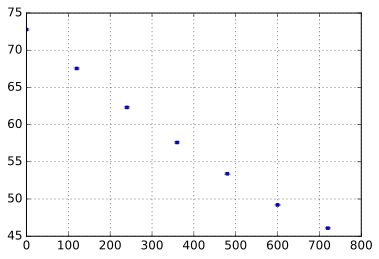

In [1]:
import scipy.optimize as o
from sqlalchemy import create_engine

db = create_engine("sqlite:///213.db")

data2 = pd.read_sql('dämpfung', db)
data2.iloc[:,1] = 2*pi*data2.iloc[:,1] / 60
display(data2)
dw = 5/60

figure()
errorbar(data2.iloc[:,0], data2.iloc[:,1], yerr=dw, fmt='bs')
grid()
# yscale('log')

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

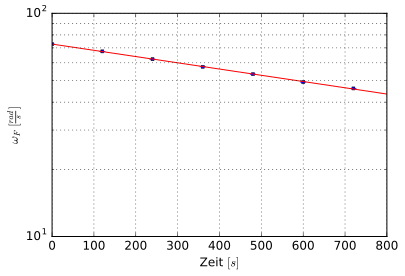

In [21]:
ff_d = lambda t, d, A: A*exp(-d*t)
popt, pcov = o.curve_fit(ff_d, data2.iloc[:,0], data2.iloc[:,1], sigma=dw, p0=(1e-4, data2.iloc[0,1]))
D = popt[0]
dD = sqrt(pcov[0][0])
A = popt[1]
tau = -1/D
t12 = log(1/2) * tau
dt12 = t12 * dD/D
display(Latex(r"$D = ({0:.3} \pm {1:.1}) \cdot 10^{{-4}}$".format(D*10**4, dD*10**4)))
display(Latex(r"$\tau = {0}$".format(tau)))
display(Latex(r"$A = {0}$".format(A)))
display(Latex(r"$t_{{1/2}} = {0:4.0f} \pm {1:1.0f}$".format(t12, dt12)))

figure()
errorbar(data2.iloc[:,0], data2.iloc[:,1], yerr=dw, fmt='bs')
plot(arange(0,800, 0.1), ff_d(arange(0,800, 0.1), D, A), 'r-')
xlabel(r"Zeit $[s]$")
ylabel(r"$\omega_F \ [\frac{{rad}}{{s}}]$")
grid(which='both')
yscale('log')

In [3]:
data3 = pd.read_sql('präzession', db)
data3.iloc[:,0] = 2 * pi * data3.iloc[:,0] / 60
display(data3)

$\omega_F \ [\frac{{rad}}{{s}}]$  $T_1 \ [s]$  $T_2 \ [s]$  $T_3 \ [s]$  \
0                         70.685835       110.37        87.37        60.28   
1                         62.308254        97.64        74.75        52.58   
2                         44.505896        68.29        54.58        37.50   
3                         31.415927        50.12        38.59        26.64   

   $T_4 \ [s]$  
0        46.77  
1        40.73  
2        28.70  
3        20.62

In [4]:
exp_D = lambda t, w0: w0 * exp(-D*t)

w_end_cols = [r'$\omega_F \ [\frac{{rad}}{{s}}]$',*[r'$\omega_{{end,{0}}} \ [\frac{{rad}}{{s}}]$'.format(i) for i in range(1,5)]]
w_end = pd.DataFrame([data3.iloc[:,0], *[exp_D(data3[i], data3.iloc[:,0]) for i in data3.iloc[:,1:]]], index=w_end_cols).transpose()
display(w_end)

wm_cols = [r'$\omega_F \ [\frac{{rad}}{{s}}]$',*[r'$\overline{{\omega_{{F,{0}}}}} \ [\frac{{rad}}{{s}}]$'.format(i) for i in range(1,5)]]
wm = pd.DataFrame([data3.iloc[:,0], *[(data3.iloc[:,0]+w_end[i])/2 for i in w_end.iloc[:,1:]]], index=wm_cols).transpose()
display(wm)

$\omega_F \ [\frac{{rad}}{{s}}]$  $\omega_{end,1} \ [\frac{rad}{s}]$  \
0                         70.685835                           65.837085   
1                         62.308254                           58.511787   
2                         44.505896                           42.591429   
3                         31.415927                           30.418322   

   $\omega_{end,2} \ [\frac{rad}{s}]$  $\omega_{end,3} \ [\frac{rad}{s}]$  \
0                           66.819294                           67.994975   
1                           59.380506                           60.234193   
2                           42.969057                           43.444195   
3                           30.644976                           30.881669   

   $\omega_{end,4} \ [\frac{rad}{s}]$  
0                           68.589005  
1                           60.695516  
2                           43.691044  
3                           31.001598

$\omega_F \ [\frac{{rad}}{{s}}]$  \
0                         70.685835   
1                         62.308254   
2                         44.505896   
3                         31.415927   

   $\overline{\omega_{F,1}} \ [\frac{rad}{s}]$  \
0                                    68.261460   
1                                    60.410021   
2                                    43.548662   
3                                    30.917124   

   $\overline{\omega_{F,2}} \ [\frac{rad}{s}]$  \
0                                    68.752564   
1                                    60.844380   
2                                    43.737476   
3                                    31.030451   

   $\overline{\omega_{F,3}} \ [\frac{rad}{s}]$  \
0                                    69.340405   
1                                    61.271224   
2                                    43.975045   
3                                    31.148798   

   $\overline{\omega_{F,4}} \ [\frac{rad}{s}]$  
0                                    69.637420  
1                                    61.501885  
2                                    44.098470  
3                                    31.208762

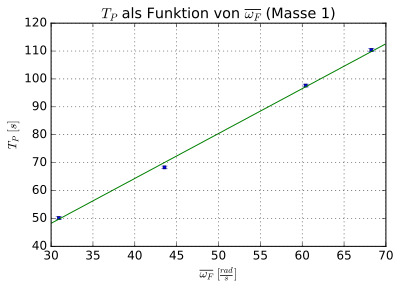

<IPython.core.display.Latex object>

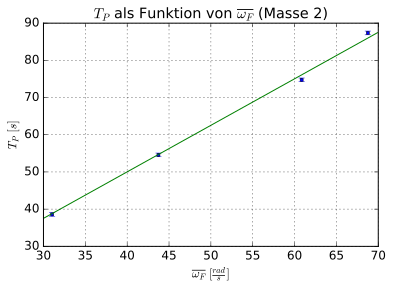

<IPython.core.display.Latex object>

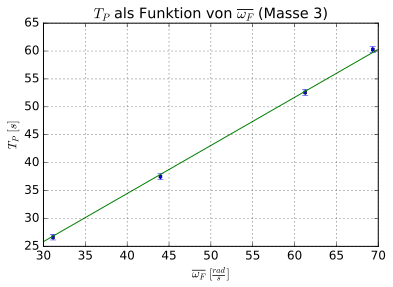

<IPython.core.display.Latex object>

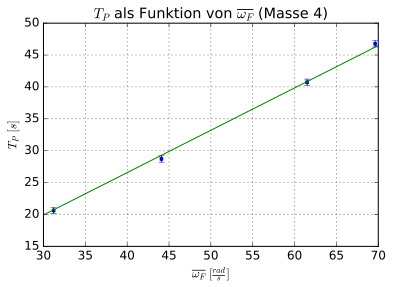

<IPython.core.display.Latex object>

In [5]:
ff_T = lambda w,m:m*w
popt = []
pcov = []
for i in range(0,4):
    figure()
    popt_, pcov_ = o.curve_fit(ff_T, wm.iloc[:,i+1], data3.iloc[:,i+1], sigma=0.5)
    popt.append(*popt_)
    pcov.append(pcov_)
    errorbar(wm.iloc[:,i+1], data3.iloc[:,i+1], yerr=0.5, fmt='s')
    plot(arange(30,70,0.1), ff_T(arange(30,70,0.1), popt_))
    xlabel(r"$\overline{\omega_F} \ [\frac{{rad}}{{s}}]$")
    ylabel(r"$T_P \ [s]$")
    title(r"$T_P$ als Funktion von $\overline{{\omega_F}}$ (Masse {0})".format(i+1))
    grid()
    show()
    display(Latex(r"$s_{0} = {1:.5} \pm {2:.2} $".format(i+1, *popt_, sqrt(pcov_[0][0]))))

In [6]:
from fehler import fehler
m = 9.85e-3
g = 9.80984
s_s, m_s, l_s = sm.symbols('s m l')
ds_s, dm_s, dl_s = sm.symbols('ds dm dl')
Iz = s_s/(2*pi) * m_s * g * l_s
Iz_abs, Iz_rel = fehler(Iz, s_s, m_s, l_s)
dataI = pd.DataFrame([pd.Series([Iz.subs([(s_s,popt[0]),
                                          (m_s,m),
                                          (l_s, 0.15)
                                         ]),
                                 Iz.subs([(s_s,popt[1]),
                                          (m_s,m),
                                          (l_s, 0.2)
                                         ]),
                                 Iz.subs([(s_s,popt[2]),
                                          (m_s,2*m),
                                          (l_s, 0.15)
                                         ]),
                                 Iz.subs([(s_s,popt[3]),
                                          (m_s,2*m),
                                          (l_s, 0.20)
                                         ])
                                ], name="$I_z [kg \cdot m^2]$"),
                      pd.Series([Iz_abs.subs([(s_s,popt[0]),
                                              (m_s,m),
                                              (l_s, 0.15),
                                              (ds_s, sqrt(pcov[0][0][0])),
                                              (dm_s, 0),
                                              (dl_s, 0.005)
                                             ]),
                                 Iz_abs.subs([(s_s,popt[1]),
                                              (m_s,2*m),
                                              (l_s, 0.15),
                                              (ds_s, sqrt(pcov[1][0][0])),
                                              (dm_s, 0),
                                              (dl_s, 0.005)
                                             ]),
                                 Iz_abs.subs([(s_s,popt[2]),
                                              (m_s,m),
                                              (l_s, 0.20),
                                              (ds_s, sqrt(pcov[2][0][0])),
                                              (dm_s, 0),
                                              (dl_s, 0.005)
                                             ]),
                                 Iz_abs.subs([(s_s,popt[3]),
                                              (m_s,2*m),
                                              (l_s, 0.20),
                                              (ds_s, sqrt(pcov[3][0][0])),
                                              (dm_s, 0),
                                              (dl_s, 0.005)
                                             ])
                     ], name="$\Delta I_z$")], dtype=float).transpose().round(5)
display(dataI)
I_z = dataI.iloc[:,0].mean()
dI_z = 1/4*sqrt(sum(dataI.iloc[:,1]**2))
display(Latex(r"$I_z = {0:.5f} \pm {1:.5f} $".format(I_z,dI_z)))

$I_z [kg \cdot m^2]$  $\Delta I_z$
0               0.00371       0.00013
1               0.00385       0.00020
2               0.00398       0.00007
3               0.00409       0.00011

<IPython.core.display.Latex object>

In [7]:
data4 = pd.read_sql('drehachse', db)
data4.iloc[:,0] = 2 * pi * data4.iloc[:,0]/60
data4[r"$\Omega \ [\frac{{rad}}{{s}}]$"] = 2*pi*10/data4.iloc[:,1]
data4["$\Delta \Omega $"] = 2*pi*10/(data4.iloc[:,1]**2)*0.2
display(data4)

$\omega_F \ [\frac{{rad}}{{s}}]$  $T_{{10}} \ [s]$  \
0                         60.213859             16.54   
1                         57.595865             17.70   
2                         54.977871             18.65   
3                         52.359878             19.26   
4                         49.741884             20.51   
5                         47.123890             21.59   
6                         44.505896             22.81   
7                         41.887902             24.51   
8                         39.269908             25.90   
9                         36.651914             27.65   

   $\Omega \ [\frac{{rad}}{{s}}]$  $\Delta \Omega $  
0                        3.798782          0.045934  
1                        3.549822          0.040111  
2                        3.369000          0.036129  
3                        3.262298          0.033876  
4                        3.063474          0.029873  
5                        2.910229          0.026959  
6                        2.754575          0.024152  
7                        2.563519          0.020918  
8                        2.425940          0.018733  
9                        2.272400          0.016437

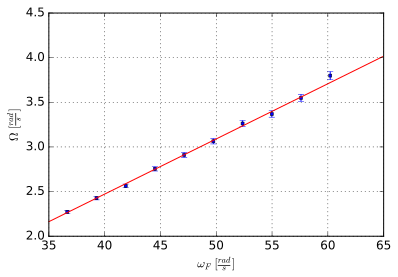

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [8]:
ff_O = lambda w, p: p*w
popt, pcov = o.curve_fit(ff_O, data4.iloc[:,0], data4.iloc[:,2], sigma=data4.iloc[:,3])
p = popt[0]

figure()
errorbar(data4.iloc[:,0], data4.iloc[:,2], yerr=data4.iloc[:,3], fmt='bs')
plot(arange(35,65,0.1), ff_O(arange(35,65,0.1), p), 'r-')
xlabel(r"$\omega_F \ [\frac{{rad}}{{s}}]$")
ylabel(r"$\Omega \ [\frac{{rad}}{{s}}]$")
grid()
show()

display(Latex(r"Steigung: ${0}$".format(p)))
Iz_s, p_s, dIz_s, dp_s = sm.symbols('I_z p dI_z dp')
Ix = Iz_s*(1/(1-p_s))
Ix_abs, Ix_rel = fehler(Ix, Iz_s, p_s)
I_x = float(Ix.subs([(Iz_s, I_z), (p_s, p)]))
dI_x = float(Ix_abs.subs([(Iz_s, I_z), (p_s, p), (dIz_s, dI_z), (dp_s, sqrt(pcov[0][0]))]))
display(Latex(r"$I_x = {0:.5f} \pm {1:.5f} $".format(I_x, dI_x)))
display(Latex(r"$I_x = {0}$".format(sm.latex(Ix))))

In [9]:
data5 = 2* pi * pd.read_sql('nutation', db)/60

dw_N = 10/60

display(data5)

$\omega_F \ [\frac{{rad}}{{s}}]$  $\omega_N \ [\frac{{rad}}{{s}}]$
0                         81.157810                         75.398224
1                         73.303829                         68.591440
2                         68.067841                         63.879051
3                         65.449847                         61.261057
4                         62.831853                         59.166662
5                         57.072267                         53.930674
6                         52.359878                         48.694686
7                         49.741884                         46.076692
8                         48.171087                         43.458698
9                         40.317106                         36.651914

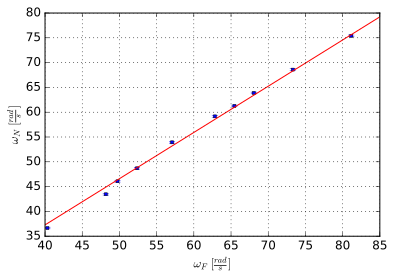

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [10]:
ff_N = lambda w, p: p*w
popt_N, pcov_N = o.curve_fit(ff_N, data5.iloc[:,0], data5.iloc[:,1], sigma=dw_N)
p_N = popt_N[0]

figure()
errorbar(data5.iloc[:,0], data5.iloc[:,1], yerr=dw_N, fmt='bs')
plot(arange(40,85,0.1), ff_N(arange(40,85,0.1), p_N), 'r-')
xlabel(r"$\omega_F \ [\frac{{rad}}{{s}}]$")
ylabel(r"$\omega_N \ [\frac{{rad}}{{s}}]$")
grid()
show()

display(Latex(r"Steigung: ${0}$".format(p_N)))
I_xN = I_z/p_N
dI_xN = I_xN * sqrt((dI_z/I_z)**2 + (sqrt(pcov_N[0][0])/p_N)**2)
display(Latex(r"$I_x = {0:.5f} \pm {1:.5f}$".format(I_xN, dI_xN)))